# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
# Import das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [12]:
# leitura do arquivo
base = pd.read_csv('nova_df.csv')


# Definição dos objetos
y = base.mau
X = base.drop('mau', axis=1)
X = X.drop('Unnamed: 0', axis=1)
features_names = X.columns
target_names = ['bom','mau']

# Separação da base entre treino/teste etreinamento do modelo
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)
clf = DecisionTreeClassifier(random_state=100,max_depth=3)
clf = clf.fit(X_train, y_train)

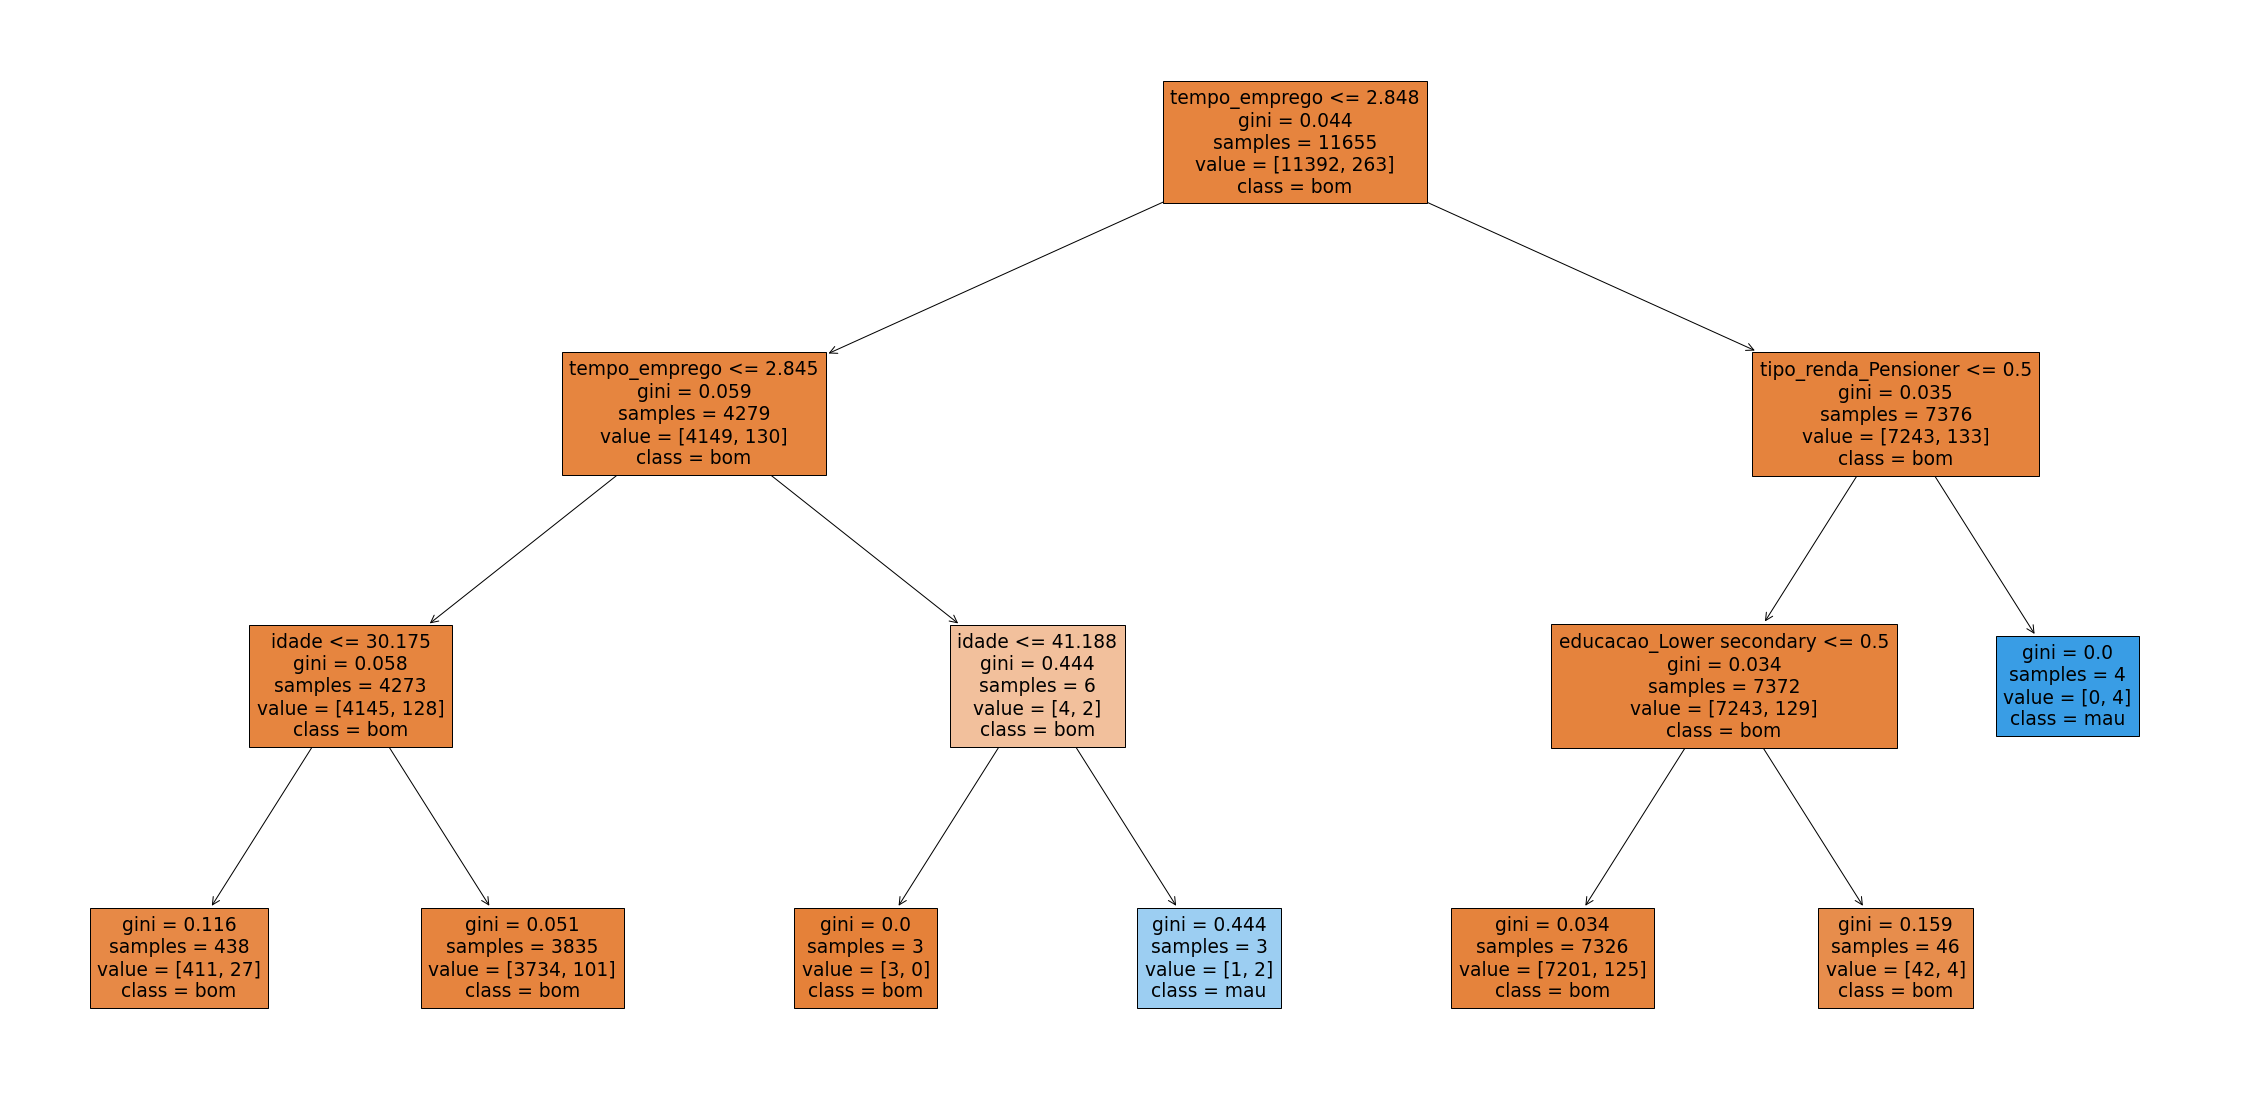

In [14]:
# Visualize a árvore
plt.figure(figsize=(40,20))
plot_tree(clf,filled=True, class_names=target_names,feature_names=features_names)
plt.show()

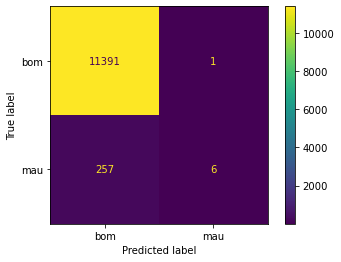

In [15]:
# Matriz de confusão para a base treino
plot_confusion_matrix(clf, X_train, y_train)
x = ['bom', 'mau']
y = ['bom', 'mau']
default_x_ticks = range(len(x))
default_y_ticks = range(len(y))
plt.xticks(default_x_ticks, x)
plt.yticks(default_y_ticks, y)
plt.show()

In [16]:
# Acurácia do Treinamento
predict_train = clf.predict(X_train)
accuracy_score(predict_train, y_train) 

0.9778635778635779

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

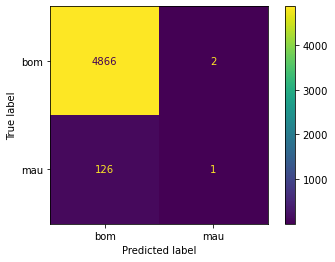

In [17]:
# Matriz de confusão para a base teste
plot_confusion_matrix(clf, X_test,y_test)
x = ['bom', 'mau']
y = ['bom', 'mau']
default_x_ticks = range(len(x))
default_y_ticks = range(len(y))
plt.xticks(default_x_ticks, x)
plt.yticks(default_y_ticks, y)
plt.show()

In [18]:
# Acurácia do Teste
predict_test = clf.predict(X_test)
accuracy_score(predict_test, y_test) 

0.9743743743743744

Modelo não possui overfiting, pois os percentuais de acurácia entre treino e teste possuem resultados semelhantes

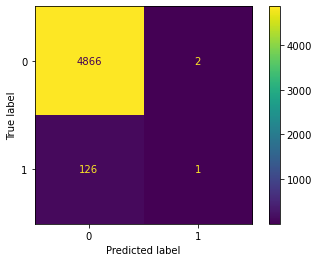

In [24]:
# Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz
clf_1 = DecisionTreeClassifier(random_state=123,max_depth=10,max_leaf_nodes=5)
clf_1 = clf_1.fit(X_train, y_train)
plot_confusion_matrix(clf_1, X_test,y_test)


In [26]:
# Acurácia do Teste
predict_test = clf_1.predict(X_test)
accuracy_score(predict_test, y_test) 

0.9743743743743744

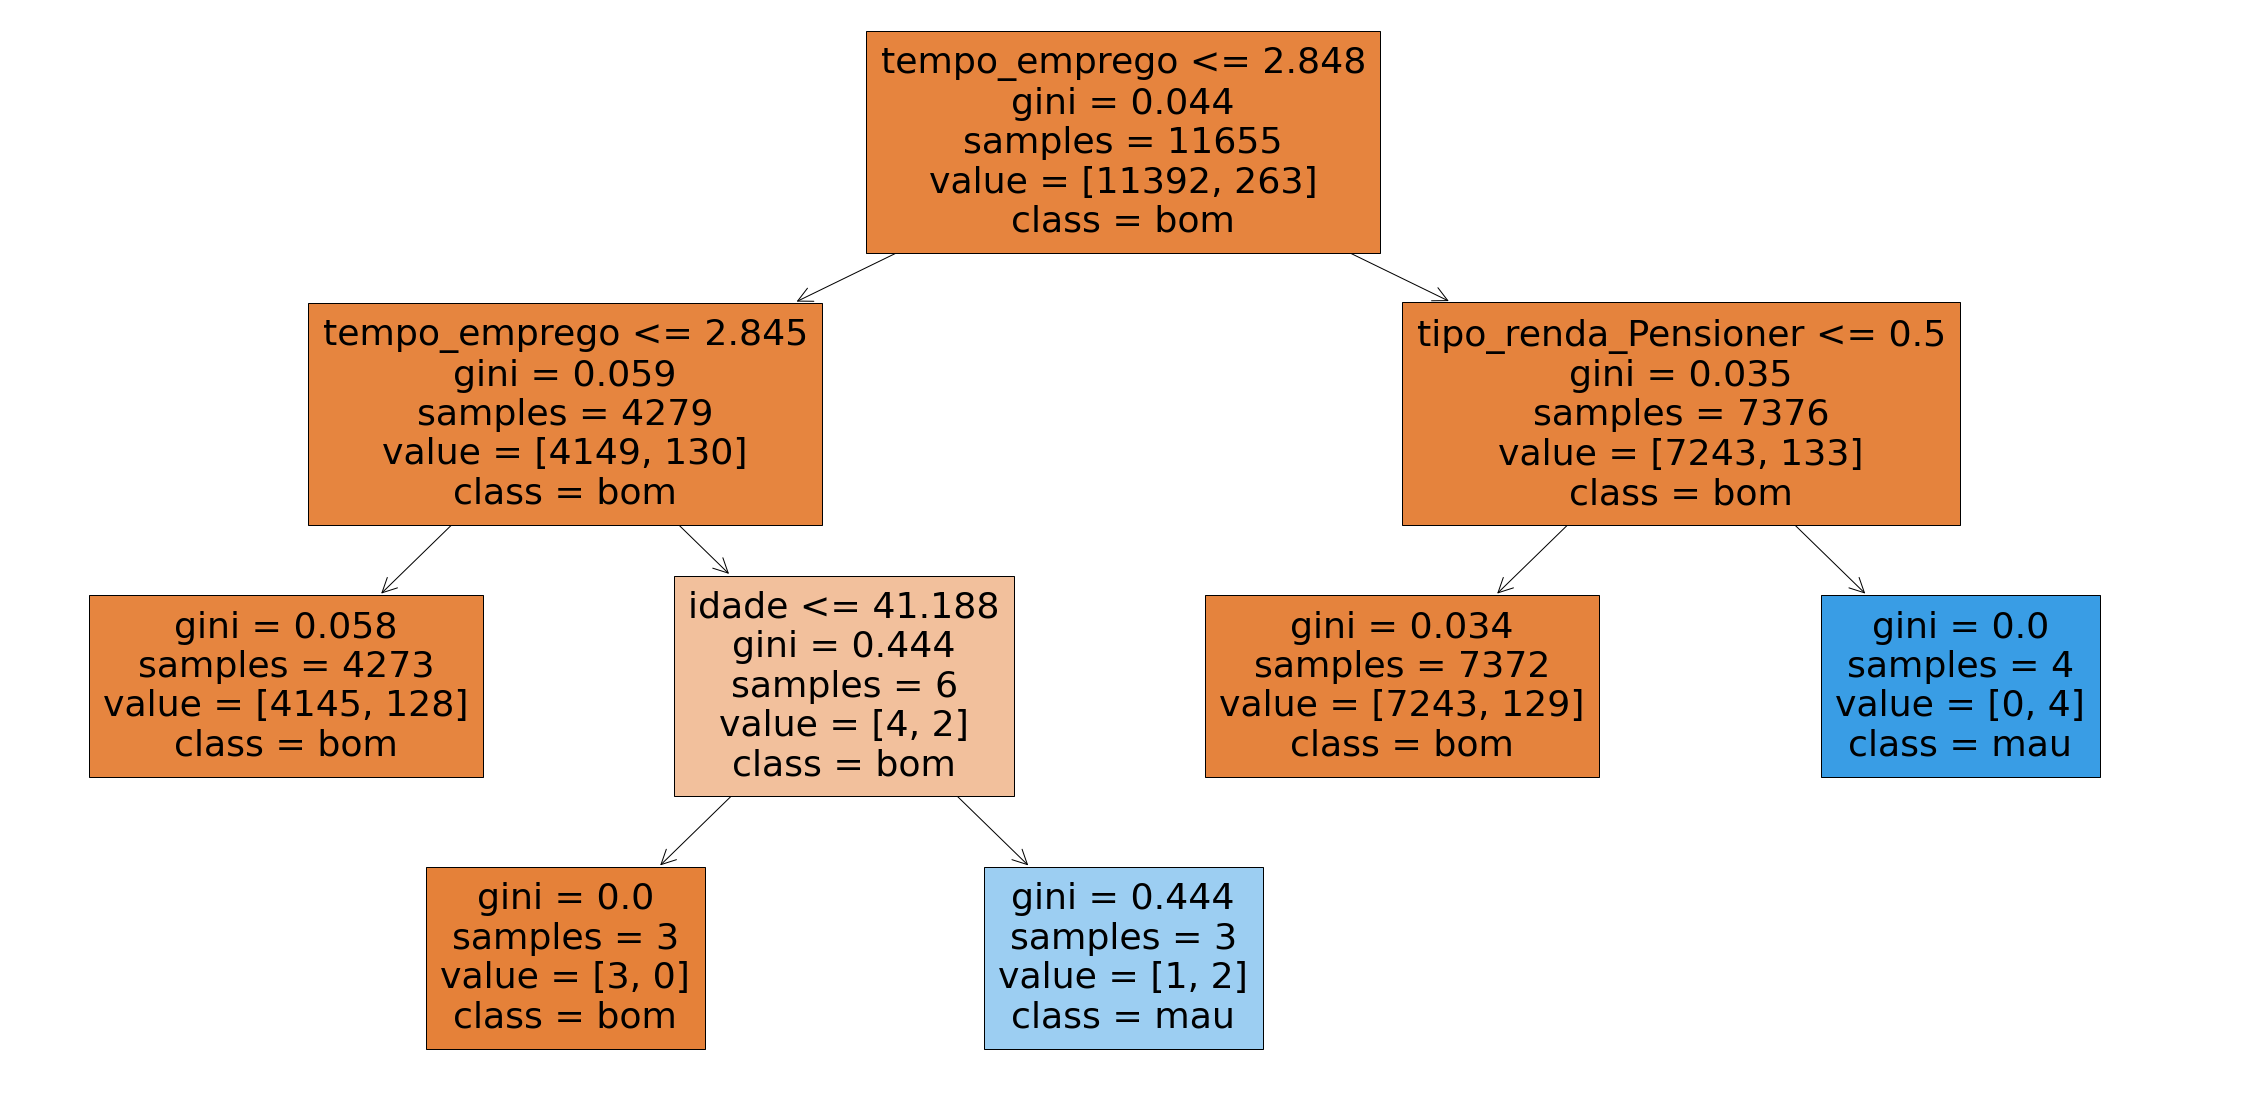

In [29]:
# Arvore de decisão
plt.figure(figsize=(40,20))
plot_tree(clf_1,filled=True, class_names=target_names,feature_names=features_names)
plt.show()

3 clientes foram classificados como mau, contudo apenas 1 era realmente mau

Caso todos os clientes fossem classificados como bom a acurácia iria ficar próxima a 99%